In [8]:
from analyzers import BacteriaSegmenter
import numpy as np
import matplotlib.pyplot as plt
import mrcfile
from utils.graph_plotter import GraphPlotter

In [2]:
test_file = "/home/mwh1998/fsl_groups/grp_tomo_db1_d3/compute/TomoDB1_d3/Hneptunium_secretin/aba2006-11-01-6/Hyphomonas_10bin_full.rec"
data = None
with mrcfile.open(test_file) as mrc:
    data = mrc.data.copy()

In [3]:
height = data.shape[0]
margin = int(height * .2)
cropped = data[margin:(height-margin), :, :]
selected_slice_idx = np.random.randint(0, cropped.shape[0]-5)
selected_slice = cropped[selected_slice_idx:selected_slice_idx + 5, :, :].mean(0)

In [4]:
def show_mask(mask, ax, random_color=False):
    if random_color:
            color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
            color = np.array([30/255, 144/255, 255/255, 0.4])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

In [5]:
segmenter = BacteriaSegmenter(device="cpu")

In [7]:
results = {}
segmenter.analyze(
    selected_slice,
    "results",
    results,
)

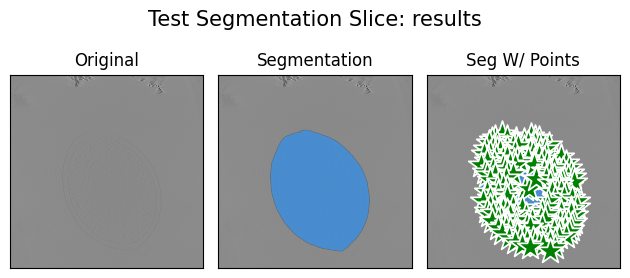

In [32]:
key = "results"
value = results["results"]
bacteria_name = "Test"

fig, axes = plt.subplots(1, 3)

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])


axes[0].set_title("Original")
axes[0].imshow(value["image"], cmap="gray")

axes[1].set_title("Segmentation")
axes[1].imshow(value["image"], cmap="gray")
GraphPlotter.show_mask(value["mask"], axes[1])

axes[2].imshow(value["image"], cmap="gray")
axes[2].set_title("Seg W/ Points")
GraphPlotter.show_mask(value["mask"], axes[2])
GraphPlotter.show_points(value["pts"]["coords"], value["pts"]["labels"], axes[2])

fig.suptitle(f"{bacteria_name} Segmentation Slice: {key}", y=.8, fontsize=15)
fig.tight_layout()

plt.show()